1. Import Library dan Siapkan Data

In [3]:
import numpy as np
import pandas as pd
from math import log2

# Dataset contoh: Apakah bermain tenis?
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)
print("Dataset:")
print(df)

Dataset:
    Outlook Temperature Humidity Windy Play
0     Sunny         Hot     High    No   No
1     Sunny         Hot     High   Yes   No
2  Overcast         Hot     High    No  Yes
3     Rainy        Mild     High    No  Yes
4     Rainy        Cool   Normal    No  Yes
5     Rainy        Cool   Normal   Yes   No
6  Overcast        Cool   Normal   Yes  Yes
7     Sunny        Mild     High    No   No


In [ ]:
#2. Hitung Entropy (Ukuran Ketidakmurnian)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = 0
    for i in range(len(elements)):
        p = counts[i] / len(target_col)
        entropy += -p * log2(p)
    return entropy

# Contoh hitung entropy target 'Play'
play_entropy = entropy(df['Play'])
print(f"\nEntropy awal: {play_entropy:.3f}")

#Penjelasan:

# Entropy mengukur ketidakmurnian data. Nilai 0 berarti murni (semua sampel satu kelas).




Entropy awal: 1.000


In [5]:
#3. Hitung Information Gain untuk Setiap Fitur

def information_gain(data, feature, target):
    # Hitung entropy total
    total_entropy = entropy(data[target])
    
    # Hitung entropy untuk setiap nilai fitur
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[feature] == values[i]]
        subset_entropy = entropy(subset[target])
        weighted_entropy += (counts[i] / len(data)) * subset_entropy
    
    # Hitung information gain
    return total_entropy - weighted_entropy

# Contoh hitung IG untuk fitur 'Outlook'
ig_outlook = information_gain(df, 'Outlook', 'Play')
print(f"Information Gain 'Outlook': {ig_outlook:.3f}")

Information Gain 'Outlook': 0.656


In [6]:
#4. Pilih Fitur dengan Information Gain Tertinggi
def choose_best_feature(data, features, target):
    best_ig = -1
    best_feature = None
    for feature in features:
        ig = information_gain(data, feature, target)
        if ig > best_ig:
            best_ig = ig
            best_feature = feature
    return best_feature

features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
best_feature = choose_best_feature(df, features, 'Play')
print(f"\nFitur terbaik untuk split: {best_feature}")


Fitur terbaik untuk split: Outlook


In [8]:
def build_tree(data, features, target):
    # Base case 1: Semua target sama
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    
    # Base case 2: Tidak ada fitur tersisa
    if len(features) == 0:
        return np.unique(data[target])[np.argmax(np.unique(data[target], return_counts=True)[1])]
    
    # Pilih fitur terbaik
    best_feature = choose_best_feature(data, features, target)
    tree = {best_feature: {}}
    
    # Hapus fitur yang sudah dipilih
    new_features = [f for f in features if f != best_feature]
    
    # Rekursif untuk setiap nilai fitur
    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        subtree = build_tree(subset, new_features, target)
        tree[best_feature][value] = subtree
    
    return tree

# Bangun pohon
decision_tree = build_tree(df, features, 'Play')
print("\nStruktur Decision Tree:")
print(decision_tree)



Struktur Decision Tree:
{'Outlook': {'Overcast': 'Yes', 'Rainy': {'Windy': {'No': 'Yes', 'Yes': 'No'}}, 'Sunny': 'No'}}


In [9]:
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree  # Leaf node
    feature = list(tree.keys())[0]
    value = sample[feature]
    subtree = tree[feature][value]
    return predict(subtree, sample)

# Contoh prediksi
sample = {'Outlook': 'Rainy', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Windy': 'No'}
prediction = predict(decision_tree, sample)
print(f"\nPrediksi untuk {sample}: {prediction}")


Prediksi untuk {'Outlook': 'Rainy', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Windy': 'No'}: Yes


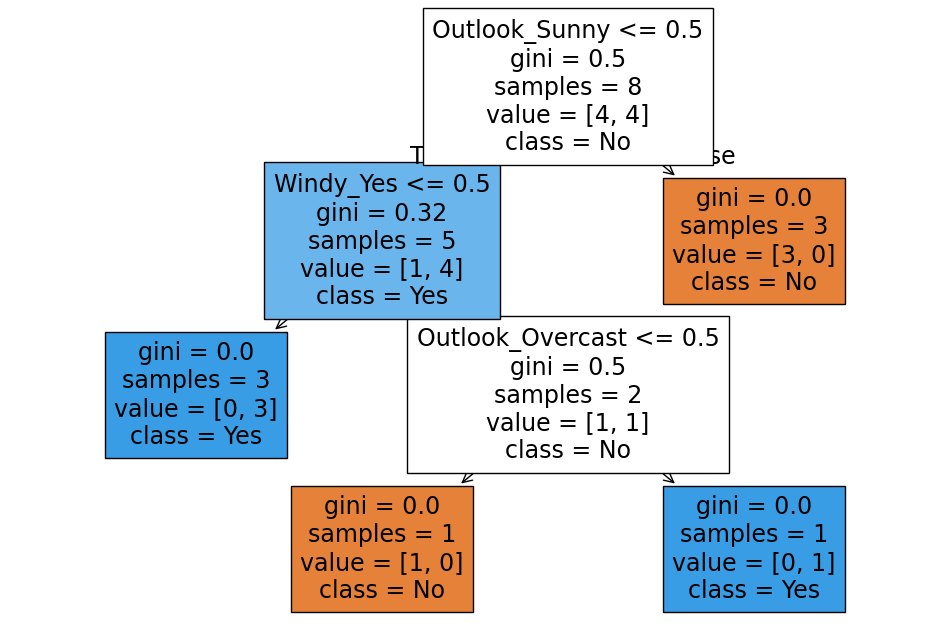

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Encode categorical features
df_encoded = pd.get_dummies(df.drop('Play', axis=1))

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(df_encoded, df['Play'])

# Visualisasi
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=df_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()